# Electric Vehicle Analysis

In [1624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import math
pd.set_option('display.max_columns', None)
import ipywidgets as widgets
from IPython.display import display, clear_output

df = pd.read_csv('cars_data_RAW.csv')
df

,Row_ID,title,model,battery,price-range,0 - 100,Top Speed,Range*,Efficiency*,Fastcharge*,Germany_price_before_incentives,Netherlands_price_before_incentives,UK_price_after_incentives,Drive_Configuration,Tow_Hitch,Towing_capacity_in_kg,Number_of_seats
0,1,Tesla,Model 3,57.5,104,6.1 sec,201 km/h,415 km,139 Wh/km,690 km/h,"€41,970","€41,990","£39,990",Rear Wheel Drive,Towbar possible,1000.0,5
1,2,Tesla,Model Y,57.5,137,6.9 sec,217 km/h,350 km,164 Wh/km,580 km/h,"€45,970","€45,990","£44,990",Rear Wheel Drive,Towbar possible,1600.0,5
2,3,Tesla,Model Y Long Range Dual Motor,75.0,130,5.0 sec,217 km/h,435 km,172 Wh/km,670 km/h,"€55,970","€52,990","£52,990",All Wheel Drive,Towbar possible,1600.0,5
3,4,Tesla,Model 3 Long Range Dual Motor,75.0,106,4.4 sec,201 km/h,500 km,150 Wh/km,770 km/h,"€50,970","€49,990","£49,990",All Wheel Drive,Towbar possible,1000.0,5
4,5,Tesla,Model Y Long Range RWD,75.0,109,5.9 sec,217 km/h,460 km,163 Wh/km,710 km/h,"€49,970","€49,990",NaN,Rear Wheel Drive,Towbar possible,1600.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,349,Mercedes-benz,eVito Tourer Long 60 kWh,60.0,311,12.0 sec,160 km/h,220 km,273 Wh/km,210 km/h,"€68,398",NaN,NaN,Front Wheel Drive,NaN,NaN,8
330,350,Mercedes-benz,eVito Tourer Extra-Long 60 kWh,60.0,322,12.0 sec,160 km/h,215 km,279 Wh/km,200 km/h,"€69,309",NaN,NaN,Front Wheel Drive,NaN,NaN,8
331,351,Kgm,Torres EVX,72.0,130,8.1 sec,175 km/h,350 km,206 Wh/km,390 km/h,"€43,990","€41,250","£44,495",Front Wheel Drive,Towbar possible,1500.0,5
332,352,Mini,Aceman E,38.5,163,7.9 sec,160 km/h,230 km,167 Wh/km,370 km/h,"* €37,000","€38,990","£31,800",Front Wheel Drive,NaN,NaN,5


# Data Cleaning

In [1625]:
# Unecessary Tow hitch boolean column
df.drop(columns=['Tow_Hitch', 'price-range', 'Row_ID'], inplace=True)

In [1626]:
# Replace NaN with 0 for towing capacity
df['Towing_capacity_in_kg'].fillna(0, inplace=True)

In [1627]:
# Remove units
df['0 - 100'] = df['0 - 100'].str.replace(' sec', '')
df['Top Speed'] = df['Top Speed'].str.replace(' km/h', '')
df['Range*'] = df['Range*'].str.replace(' km', '')
df['Efficiency*'] = df['Efficiency*'].str.replace(' Wh/km', '')
df['Fastcharge*'] = df['Fastcharge*'].str.replace(' km/h', '')

df['Germany_price_before_incentives'] = df['Germany_price_before_incentives'].str.replace(r'[€,]', '', regex=True)
df['Netherlands_price_before_incentives'] = df['Netherlands_price_before_incentives'].str.replace(r'[€,]', '', regex=True)
df['UK_price_after_incentives'] = df['UK_price_after_incentives'].str.replace(r'[£,]', '', regex=True)
df['Germany_price_before_incentives'] = df['Germany_price_before_incentives'].str.replace(r'[*,]', '', regex=True)
df['Netherlands_price_before_incentives'] = df['Netherlands_price_before_incentives'].str.replace(r'[*,]', '', regex=True)
df['UK_price_after_incentives'] = df['UK_price_after_incentives'].str.replace(r'[*,]', '', regex=True)


df.rename(columns={'battery': 'battery(kWh)',
                   '0 - 100': '0-100(sec)', 
                   'Top Speed':'Top-Speed(km/h)',
                   'Range*':'Range(km)',
                   'Efficiency*':'Efficiency(Wh/km)',
                   'Fastcharge*':'Fastcharge(km/h)'},
                   inplace=True)
df

,title,model,battery(kWh),0-100(sec),Top-Speed(km/h),Range(km),Efficiency(Wh/km),Fastcharge(km/h),Germany_price_before_incentives,Netherlands_price_before_incentives,UK_price_after_incentives,Drive_Configuration,Towing_capacity_in_kg,Number_of_seats
0,Tesla,Model 3,57.5,6.1,201,415,139,690,41970,41990,39990,Rear Wheel Drive,1000.0,5
1,Tesla,Model Y,57.5,6.9,217,350,164,580,45970,45990,44990,Rear Wheel Drive,1600.0,5
2,Tesla,Model Y Long Range Dual Motor,75.0,5.0,217,435,172,670,55970,52990,52990,All Wheel Drive,1600.0,5
3,Tesla,Model 3 Long Range Dual Motor,75.0,4.4,201,500,150,770,50970,49990,49990,All Wheel Drive,1000.0,5
4,Tesla,Model Y Long Range RWD,75.0,5.9,217,460,163,710,49970,49990,NaN,Rear Wheel Drive,1600.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,Mercedes-benz,eVito Tourer Long 60 kWh,60.0,12.0,160,220,273,210,68398,NaN,NaN,Front Wheel Drive,0.0,8
330,Mercedes-benz,eVito Tourer Extra-Long 60 kWh,60.0,12.0,160,215,279,200,69309,NaN,NaN,Front Wheel Drive,0.0,8
331,Kgm,Torres EVX,72.0,8.1,175,350,206,390,43990,41250,44495,Front Wheel Drive,1500.0,5
332,Mini,Aceman E,38.5,7.9,160,230,167,370,37000,38990,31800,Front Wheel Drive,0.0,5


In [1628]:
df.isnull().sum()

title                                   0
model                                   0
battery(kWh)                            0
0-100(sec)                              0
Top-Speed(km/h)                         0
Range(km)                               0
Efficiency(Wh/km)                       0
Fastcharge(km/h)                        0
Germany_price_before_incentives        13
Netherlands_price_before_incentives    31
UK_price_after_incentives              92
Drive_Configuration                     0
Towing_capacity_in_kg                   0
Number_of_seats                         0
dtype: int64

In [1629]:
# Convert prices to floats
df['Germany_price_before_incentives'].astype(float)
df['Germany_price_before_incentives'] = pd.to_numeric(df['Germany_price_before_incentives'], errors='coerce')
df['Netherlands_price_before_incentives'].astype(float)
df['Netherlands_price_before_incentives'] = pd.to_numeric(df['Netherlands_price_before_incentives'], errors='coerce')
df['UK_price_after_incentives'].astype(float)
df['UK_price_after_incentives'] = pd.to_numeric(df['UK_price_after_incentives'], errors='coerce')

In [1630]:
# Calculate estimated US prices 
df['USD_est'] = df['Germany_price_before_incentives']*1.07
df['USD_est'].fillna(df['Netherlands_price_before_incentives']*1.07, inplace=True) 
df['USD_est'].fillna(df['UK_price_after_incentives']*1.07, inplace=True)

# Goal is to get null values to 0
df.isnull().sum()

title                                   0
model                                   0
battery(kWh)                            0
0-100(sec)                              0
Top-Speed(km/h)                         0
Range(km)                               0
Efficiency(Wh/km)                       0
Fastcharge(km/h)                        0
Germany_price_before_incentives        13
Netherlands_price_before_incentives    31
UK_price_after_incentives              92
Drive_Configuration                     0
Towing_capacity_in_kg                   0
Number_of_seats                         0
USD_est                                 0
dtype: int64

In [1631]:
df.drop(columns=['Germany_price_before_incentives', 
                 'Netherlands_price_before_incentives',
                 'UK_price_after_incentives'], inplace=True)


In [1632]:
df['battery(kWh)'] = pd.to_numeric(df['battery(kWh)'], errors='coerce')
df['0-100(sec)'] = pd.to_numeric(df['0-100(sec)'], errors='coerce')
df['Top-Speed(km/h)'] = pd.to_numeric(df['Top-Speed(km/h)'], errors='coerce')
df['Range(km)'] = pd.to_numeric(df['Range(km)'], errors='coerce')
df['Efficiency(Wh/km)'] = pd.to_numeric(df['Efficiency(Wh/km)'], errors='coerce')
df['Fastcharge(km/h)'] = pd.to_numeric(df['Fastcharge(km/h)'], errors='coerce')
df['Towing_capacity_in_kg'] = pd.to_numeric(df['Towing_capacity_in_kg'], errors='coerce')
df['USD_est'] = pd.to_numeric(df['USD_est'], errors='coerce')

In [1633]:
df

,title,model,battery(kWh),0-100(sec),Top-Speed(km/h),Range(km),Efficiency(Wh/km),Fastcharge(km/h),Drive_Configuration,Towing_capacity_in_kg,Number_of_seats,USD_est
0,Tesla,Model 3,57.5,6.1,201,415,139,690.0,Rear Wheel Drive,1000.0,5,44907.90
1,Tesla,Model Y,57.5,6.9,217,350,164,580.0,Rear Wheel Drive,1600.0,5,49187.90
2,Tesla,Model Y Long Range Dual Motor,75.0,5.0,217,435,172,670.0,All Wheel Drive,1600.0,5,59887.90
3,Tesla,Model 3 Long Range Dual Motor,75.0,4.4,201,500,150,770.0,All Wheel Drive,1000.0,5,54537.90
4,Tesla,Model Y Long Range RWD,75.0,5.9,217,460,163,710.0,Rear Wheel Drive,1600.0,5,53467.90
...,...,...,...,...,...,...,...,...,...,...,...,...
329,Mercedes-benz,eVito Tourer Long 60 kWh,60.0,12.0,160,220,273,210.0,Front Wheel Drive,0.0,8,73185.86
330,Mercedes-benz,eVito Tourer Extra-Long 60 kWh,60.0,12.0,160,215,279,200.0,Front Wheel Drive,0.0,8,74160.63
331,Kgm,Torres EVX,72.0,8.1,175,350,206,390.0,Front Wheel Drive,1500.0,5,47069.30
332,Mini,Aceman E,38.5,7.9,160,230,167,370.0,Front Wheel Drive,0.0,5,39590.00


# Graphs and Visualization

## Frequency of brands

In [1634]:
df_makes = df.groupby(df['title']).size().reset_index(name='count')

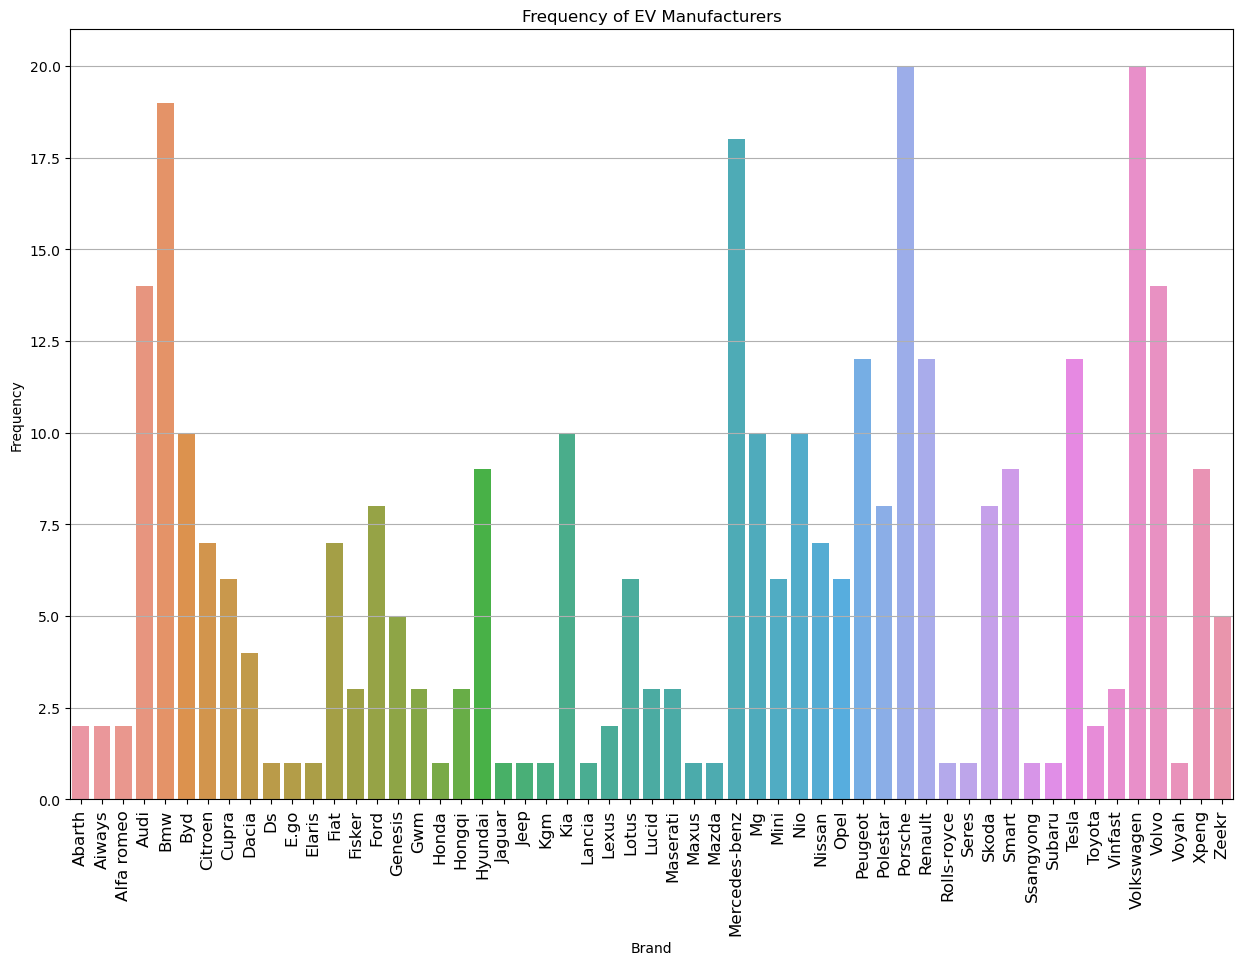

In [1635]:
plt.figure(figsize=(15, 10))
sb.barplot(x='title',y='count',data=df_makes)
plt.grid(axis='y')
plt.title('Frequency of EV Manufacturers')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=12);

## Maximums organized by brand

In [1636]:
selection_to_variable = {
    'Battery Capacity (kWh)': 'battery(kWh)',
    'Efficiency (Wh/km)': 'Efficiency(Wh/km)',
    '0-100km/h Time (sec)': '0-100(sec)',
    'Top Speed (km/hr)': 'Top-Speed(km/h)', 
    'Range (km)': 'Range(km)', 
    'Price (U$D)': 'USD_est',
    'Fast Charging Speed (km/h)': 'Fastcharge(km/h)', 
    'Towing Capacity (kg)': 'Towing_capacity_in_kg'
}

In [1637]:
def on_select(change):
    clear_output(wait=True)
    print('Maximums from Each Brand')
    display(dropdown)
    
    sel = change['new']
    if sel != 'Select...':
        #print(f"Selected Graph: {sel}")  
        var_sel = selection_to_variable.get(sel)

        df_sel = df.groupby(df['title'])[var_sel].max().reset_index(name='count')
        plt.figure(figsize=(15, 8))
        sb.barplot(x='title', y='count', data=df_sel)
        plt.grid(axis='y')
        plt.title(f'Maximum {sel} offered by EV Manufacturers')
        plt.xlabel('Brand')
        plt.ylabel(sel)
        plt.xticks(rotation=90, fontsize=12)
        plt.show()

In [1638]:
categories = ['Select...','Battery Capacity (kWh)', 'Efficiency (Wh/km)', 
              '0-100km/h Time (sec)', 'Top Speed (km/hr)', 
              'Range (km)', 'Price (U$D)', 'Fast Charging Speed (km/h)', 
              'Towing Capacity (kg)']
dropdown = widgets.Dropdown(
    options=categories,
    value=categories[0],
    description='Select a category:',
    style={'description_width': 'initial'}
)

dropdown.observe(on_select, names='value')
print('Maximums from Each Brand')
display(dropdown)

Maximums from Each Brand


Dropdown(description='Select a category:', options=('Select...', 'Battery Capacity (kWh)', 'Efficiency (Wh/km)…

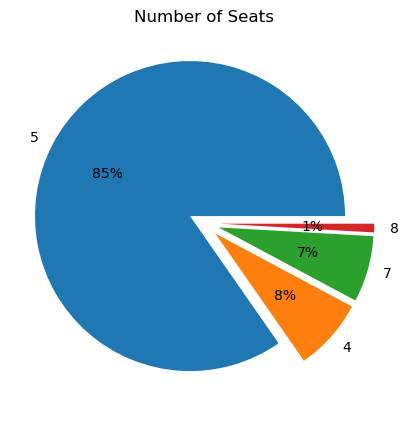

In [1639]:
df['Number_of_seats'].value_counts().head(4).plot.pie(figsize=(5,10),autopct='%.0f%%', explode=(.1,.1,.1,.1));
plt.title('Number of Seats');
plt.ylabel('');

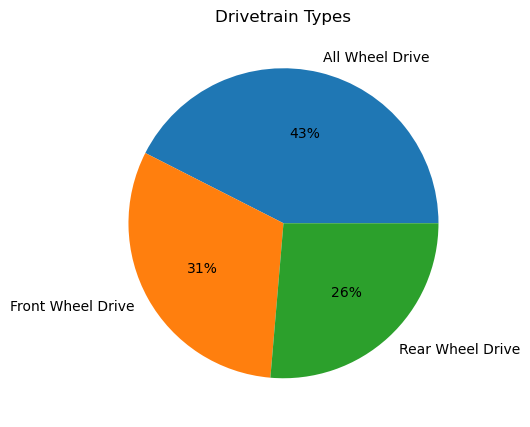

In [1640]:
df['Drive_Configuration'].value_counts().plot.pie(figsize=(5,10),autopct='%.0f%%');
plt.title('Drivetrain Types');
plt.ylabel('');

## Bests in Class

In [1641]:
def on_select2(change2):
    clear_output(wait=True)
    print('Category Leaders')
    display(dropdown2)
    display(num_entries)
    
    sel2 = change2['new']
    if sel2 != 'Select...':
        var_sel2 = selection_to_variable.get(sel2)

        df_sel2 = df.groupby(df[var_sel2]).max().sort_values(var_sel2, ascending=False).reset_index().head(num_entries.value)
        display(df_sel2)

In [1642]:
categories2 = ['Select...','Battery Capacity (kWh)', 'Efficiency (Wh/km)', 
               'Top Speed (km/hr)', 
              'Range (km)', 'Price (U$D)', 'Fast Charging Speed (km/h)', 
              'Towing Capacity (kg)']

dropdown2 = widgets.Dropdown(
    options=categories2,
    value=categories2[0],
    description='Select a category:',
    style={'description_width': 'initial'}
)

num_entries = widgets.BoundedIntText(
    value=5,
    min=1,
    max=20,
    step=1,
    description='How many entries? (max 20):',
    style={'description_width': 'initial'}
)

dropdown2.observe(on_select2, names='value')
print('Category Leaders')
display(dropdown2)
display(num_entries)

Category Leaders


Dropdown(description='Select a category:', options=('Select...', 'Battery Capacity (kWh)', 'Efficiency (Wh/km)…

BoundedIntText(value=5, description='How many entries? (max 20):', max=20, min=1, style=DescriptionStyle(descr…